Total de ratings: 25000095
Total de usuários: 162541
Total de filmes: 59047


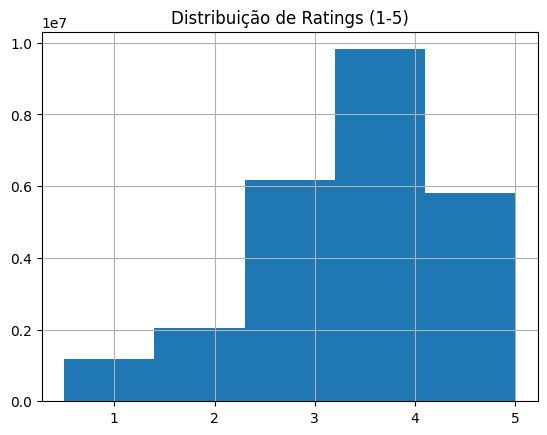

Top 10 filmes:
       movieId                                      title  \
108       110                          Braveheart (1995)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
292       296                        Pulp Fiction (1994)   
314       318           Shawshank Redemption, The (1994)   
351       356                        Forrest Gump (1994)   
475       480                       Jurassic Park (1993)   
522       527                    Schindler's List (1993)   
585       593           Silence of the Lambs, The (1991)   
2480     2571                         Matrix, The (1999)   
2867     2959                          Fight Club (1999)   

                                genres  
108                   Action|Drama|War  
257            Action|Adventure|Sci-Fi  
292        Comedy|Crime|Drama|Thriller  
314                        Crime|Drama  
351           Comedy|Drama|Romance|War  
475   Action|Adventure|Sci-Fi|Thriller  
522                          Drama|W

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
ratings = pd.read_csv("../data/raw/ml-25m/ratings.csv")
movies = pd.read_csv("../data/raw/ml-25m/movies.csv")

# 1. Estatísticas básicas
print("Total de ratings:", len(ratings))
print("Total de usuários:", ratings['userId'].nunique())
print("Total de filmes:", ratings['movieId'].nunique())

# 2. Distribuição de ratings
ratings['rating'].hist(bins=5)
plt.title("Distribuição de Ratings (1-5)")
plt.show()

# 3. Top 10 filmes mais avaliados
top_movies = ratings['movieId'].value_counts().head(10)
print("Top 10 filmes:\n", movies[movies['movieId'].isin(top_movies.index)])

In [2]:
# Missing values
print("Missing values em ratings:\n", ratings.isnull().sum())

# Ratings fora do esperado (1-5)
print("Ratings inválidos:", ratings[~ratings['rating'].between(1, 5)])

Missing values em ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Ratings inválidos:           userId  movieId  rating   timestamp
31             1     5269     0.5  1147879571
71             2       62     0.5  1141417130
77             2      261     0.5  1141417855
136            2     1722     0.5  1141415864
139            2     1923     0.5  1141417516
...          ...      ...     ...         ...
24999928  162541      344     0.5  1240949530
24999942  162541      737     0.5  1240951690
25000012  162541     2748     0.5  1240950644
25000046  162541     4370     0.5  1240949454
25000073  162541     6793     0.5  1240952009

[393068 rows x 4 columns]


# Key Findings

Q: Qual a média de ratings por usuário?

Q: Há gêneros de filmes dominantes?


In [7]:
# Qual a média de ratings por usuário?

print(f"Qual a média de ratings por usuário? R: {ratings.groupby('userId')['rating'].count().mean()}")

# Há gêneros de filmes dominantes?
print(f"Há gêneros de filmes dominantes?\n R: \n {movies['genres'].str.split('|').explode().value_counts()}")

Qual a média de ratings por usuário? R: 153.80793153727367
Há gêneros de filmes dominantes?
 R: 
 genres
Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
Name: count, dtype: int64
